# Linearity measurements


Conducted by Hans Hubert Sams <br>
Supervised by Tõnis Eenmäe<br>
Date: 07/11/2019 <br>

In [1]:
#Initialization of the worksheet
#Import all required packages/modules
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
import os
import functions as func

In [2]:
%%html
<style>
table {float:left;}
table td, table th, table tr {text-align:left !important;}
</style>

## Test equipment and setup

Test subject: Onsemi mt9p031 Mono (used for ESTCube 2 star tracker) <br>
Test location: Tartu Observatory, cleanroom (optics lab) <br><br>

Testing was done with an integrating sphere. The setup had an aperture of F8. First it was determined by trial and error the maximum and minimum shutter speed. Then for each gain the aperture of the integrating sphere was adjusted to avoid over saturation of the sensor. Measurements were made in 50 equally spaced exposures. For each exposure 2 images were captured and an additional 2 dark frames were capturerd.


1. Build the test setup according to equipment requirements and conditions. The setup should have a f-number 8 meaning that the light source is placed 8 times further from the sensor as is it's aperture.
2. In order stabilize the integrating sphere, the light source should warm up for at least an hour. During the last 15-20 minutes the sensor can be turned on to take pictures to prevent it from warming up during measurments.
3. A few shots can be taken to make sure that the sensor is working properly.
4. Experimentally determine the max and min values of exposure time. Choose a reasonably long exposure time (1/100 s or longer) and adjust the light source to reach saturation of the sensor.
5. At each exposure time take 2 measurements of irradiance and 2 dark images. 50 equally spaced exposure times at least.
6. In order to get absolute values of irradiance perform measurements at the same irradiance levels with a calibrated photodiode.
7. For flat images choose a high and low irradiance value and take around 100 measurements of irradiance at both values, including dark frames (can be around 100 as well). Do this for all gains.

### Analysis

First, the frames had to be prepared for analysis. Example code for that can be found here: https://pastebin.com/zHWrEdnT <br> <br>
After that is done, first lets display the relative spectral sensitivity to visualize the shape of the curve and see, if it matches our expectations. For that we first have to divide the median data with the irradiance of the light source.

Import the required libraries

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

Read the information from text files.

In [4]:
path = "E:\\Important stuff\\Projects\\Sensori testid\\ESEO sekundaar\\Linearity\\"

f = open(path+'linAverage.txt')
# Remove the headers
f.readline()

linData = [[],[],[],[]] # gain, shutter, mean, variance

for row in f:
    row = row.split('\t')
    linData[0].append(int(row[0]))
    linData[1].append(float(row[1]))
    linData[2].append(float(row[2]))
    linData[3].append(float(row[3].replace('\n','')))
    
f.close()
f = open(path+'darkAverage.txt')
# Remove the headers
f.readline()

darkData = [[],[],[],[]] # gain, shutter, mean, variance

for row in f:
    row = row.split('\t')
    darkData[0].append(int(row[0]))
    darkData[1].append(float(row[1]))
    darkData[2].append(float(row[2]))
    darkData[3].append(float(row[3].replace('\n','')))
f.close()

Now we want to plot the data. Variance on the y axis and mean on the x axis. We will do it seperately for each gain.

In [5]:
# Define arrays
g1 = [[],[],[]] # Time, mean, variance
g2 = [[],[],[]]
g3 = [[],[],[]]
g4 = [[],[],[]]

# Fit data into the arrays and deduct dark frame mean and variance
for i in range(len(linData[0])):
    if linData[0][i] == 1:
        g1[0].append(1/float(linData[1][i]))
        g1[1].append(float(linData[2][i])-float(darkData[2][i])) 
        g1[2].append(float(linData[3][i])-float(darkData[3][i]))
    if linData[0][i] == 2:
        g2[0].append(1/float(linData[1][i]))
        g2[1].append(float(linData[2][i])-float(darkData[2][i])) 
        g2[2].append(float(linData[3][i])-float(darkData[3][i]))
    if linData[0][i] == 3:
        g3[0].append(1/float(linData[1][i]))
        g3[1].append(float(linData[2][i])-float(darkData[2][i])) 
        g3[2].append(float(linData[3][i])-float(darkData[3][i]))
    if linData[0][i] == 4:
        g4[0].append(1/float(linData[1][i]))
        g4[1].append(float(linData[2][i])-float(darkData[2][i])) 
        g4[2].append(float(linData[3][i])-float(darkData[3][i]))

        
# Because while doing measurements it is possible that the sensor gets saturated the data points where sensor is saturated
# have to be discarded. Therefore we will have varaibles for discarding data points for each gain

g1_end = 10
g2_end = 10
g3_end = 10
g4_end = 10

# Calculate lineral regression parameters from the data.
g1_s, intercept1, r_value, p_value, std_err = stats.linregress(g1[0][g1_end:],g1[1][g1_end:])
g2_s, intercept2, r_value, p_value, std_err = stats.linregress(g2[0][g2_end:],g2[1][g2_end:])
g3_s, intercept3, r_value, p_value, std_err = stats.linregress(g3[0][g3_end:],g3[1][g3_end:])
g4_s, intercept4, r_value, p_value, std_err = stats.linregress(g4[0][g4_end:],g4[1][g4_end:])

# Make linear regression from the data
fit_g1 = np.asarray(g1[0][g1_end:])*g1_s+intercept1
fit_g2 = np.asarray(g2[0][g2_end:])*g2_s+intercept2
fit_g3 = np.asarray(g3[0][g3_end:])*g3_s+intercept3
fit_g4 = np.asarray(g4[0][g4_end:])*g4_s+intercept4

# To understand the difference from linearity, find the difference from the linear fit and measured data
dif_g1 = np.divide(np.subtract(np.asarray(g1[1][g1_end:]),fit_g1),fit_g1)
dif_g2 = np.divide(np.subtract(np.asarray(g2[1][g2_end:]),fit_g2),fit_g2)
dif_g3 = np.divide(np.subtract(np.asarray(g3[1][g3_end:]),fit_g3),fit_g3)
dif_g4 = np.divide(np.subtract(np.asarray(g4[1][g4_end:]),fit_g4),fit_g4)

#dif_g1 = np.subtract(np.asarray(g1[2][g1_end:]),fit_g1)
#dif_g2 = np.subtract(np.asarray(g2[2][g2_end:]),fit_g2)
#dif_g3 = np.subtract(np.asarray(g3[2][g3_end:]),fit_g3)
#dif_g4 = np.subtract(np.asarray(g4[2][g4_end:]),fit_g4)



Plot all the stuff

No handles with labels found to put in legend.


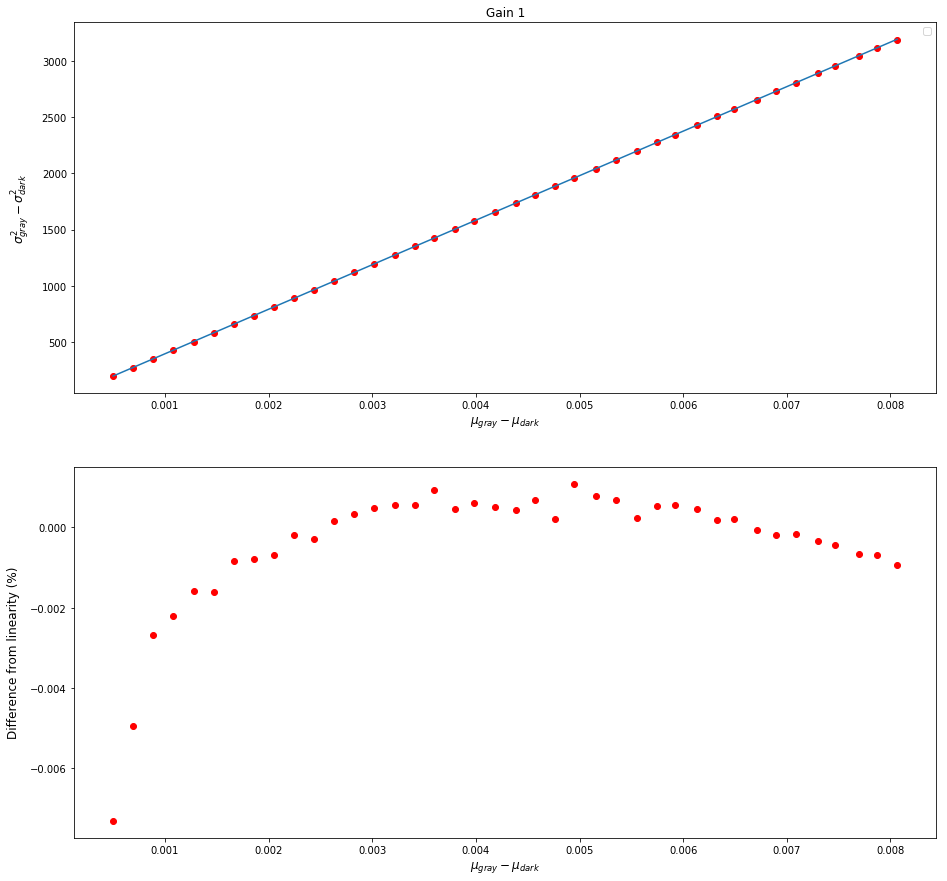

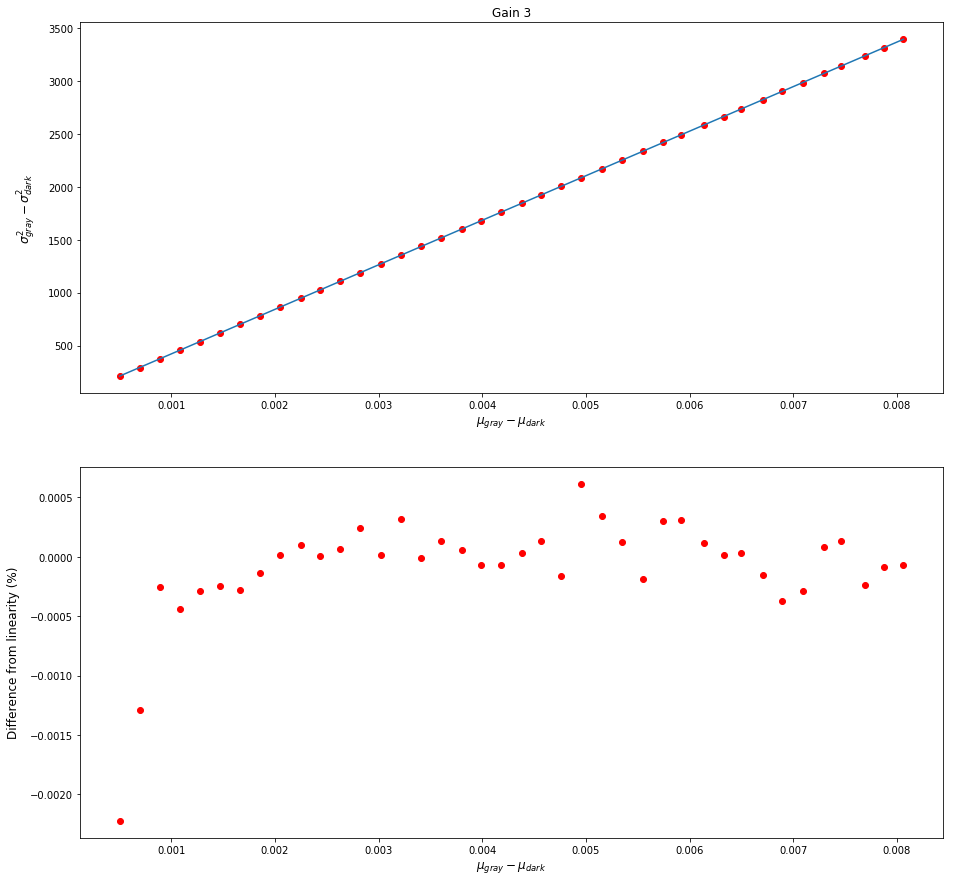

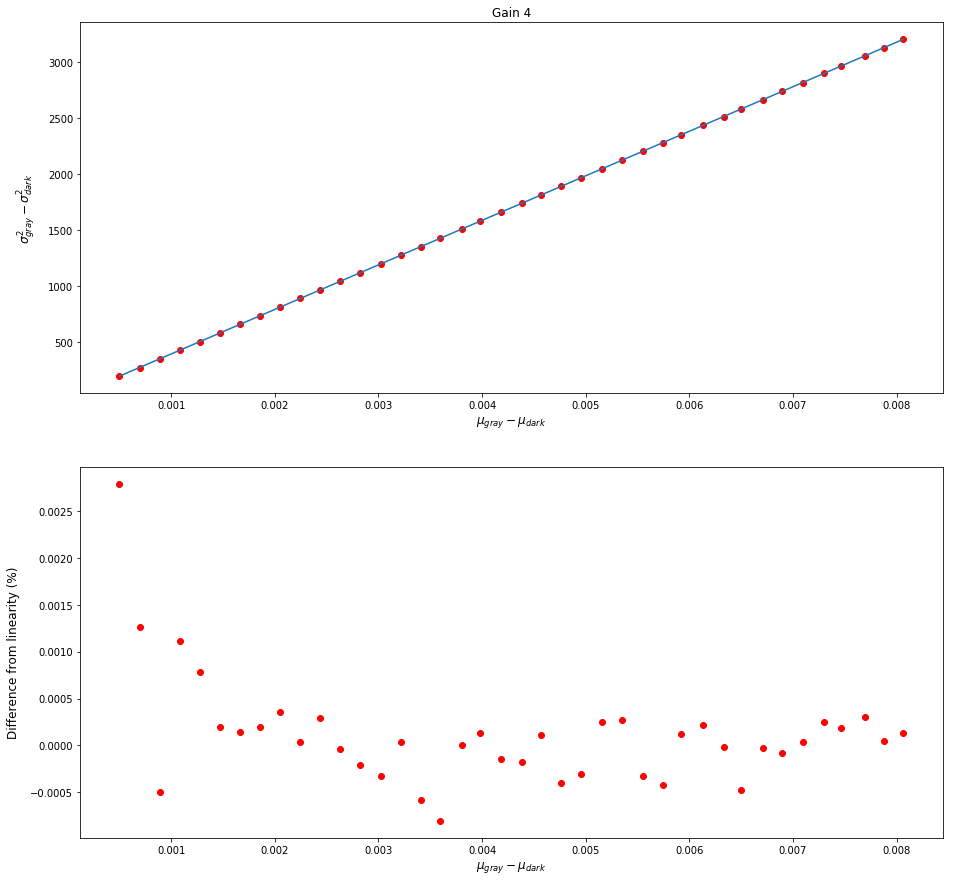

In [6]:
# Make plots and subplots
fig1 = plt.figure(figsize=(34,15))
fig2 = plt.figure(figsize=(34,15))
fig3 = plt.figure(figsize=(34,15))
fig4 = plt.figure(figsize=(34,15))
ax11 = fig1.add_subplot(2,2,1)
ax12 = fig1.add_subplot(2,2,3)
ax21 = fig2.add_subplot(2,2,1)
ax22 = fig2.add_subplot(2,2,3)
ax31 = fig3.add_subplot(2,2,1)
ax32 = fig3.add_subplot(2,2,3)
ax41 = fig4.add_subplot(2,2,1)
ax42 = fig4.add_subplot(2,2,3)

# Plot linearity with fit
ax11.plot(g1[0][g1_end:],g1[1][g1_end:],'ro',g1[0][g1_end:],fit_g1, label="")
ax21.plot(g2[0][g2_end:],g2[1][g2_end:],'ro',g2[0][g2_end:],fit_g2, label="")
ax31.plot(g3[0][g3_end:],g3[1][g3_end:],'ro',g3[0][g3_end:],fit_g3, label="")
ax41.plot(g4[0][g4_end:],g4[1][g4_end:],'ro',g4[0][g4_end:],fit_g4, label="")

# Plot difference from linearity
ax12.plot(g1[0][g1_end:],dif_g1, 'ro', label="")
ax22.plot(g2[0][g2_end:],dif_g2, 'ro', label="")
ax32.plot(g3[0][g3_end:],dif_g3, 'ro', label="")
ax42.plot(g4[0][g4_end:],dif_g4, 'ro', label="")

# Set all lables and stuff
ax11.set_xlabel("$\mu_{gray} - \mu_{dark}$",fontsize=12)
ax11.set_ylabel("$\sigma_{gray}^2 - \sigma_{dark}^2$",fontsize=12,labelpad=10)
ax21.set_xlabel("$\mu_{gray} - \mu_{dark}$",fontsize=12)
ax21.set_ylabel("$\sigma_{gray}^2 - \sigma_{dark}^2$",fontsize=12,labelpad=10)
ax31.set_xlabel("$\mu_{gray} - \mu_{dark}$",fontsize=12)
ax31.set_ylabel("$\sigma_{gray}^2 - \sigma_{dark}^2$",fontsize=12,labelpad=10)
ax41.set_xlabel("$\mu_{gray} - \mu_{dark}$",fontsize=12)
ax41.set_ylabel("$\sigma_{gray}^2 - \sigma_{dark}^2$",fontsize=12,labelpad=10)

ax12.set_xlabel("$\mu_{gray} - \mu_{dark}$",fontsize=12)
ax12.set_ylabel("Difference from linearity (%)",fontsize=12,labelpad=10)
ax22.set_xlabel("$\mu_{gray} - \mu_{dark}$",fontsize=12)
ax22.set_ylabel("Difference from linearity (%)",fontsize=12,labelpad=10)
ax32.set_xlabel("$\mu_{gray} - \mu_{dark}$",fontsize=12)
ax32.set_ylabel("Difference from linearity (%)",fontsize=12,labelpad=10)
ax42.set_xlabel("$\mu_{gray} - \mu_{dark}$",fontsize=12)
ax42.set_ylabel("Difference from linearity (%)",fontsize=12,labelpad=10)

ax11.set_title("Gain 1")
ax21.set_title("Gain 2")
ax31.set_title("Gain 3")
ax41.set_title("Gain 4")

#ax11.text(500,200,"slope ="+ str(round(g1_s,3)))
#ax21.text(500,200,"slope ="+ str(round(g2_s,3)))
#ax31.text(500,200,"slope ="+ str(round(g3_s,3)))
#ax41.text(500,200,"slope ="+ str(round(g4_s,3)))

ax11.legend()